<a href="https://colab.research.google.com/github/ctshiz/DEEP_LEARNING_STUDIES/blob/main/Deep_Learning_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREPARING THE DATA

In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2022-06-11 01:23:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.1s    

2022-06-11 01:23:10 (121 KB/s) - ‘processed.cleveland.data’ saved [18461/18461]



In [6]:
import pandas as pd
df = pd.read_csv('processed.cleveland.data',header=None)
print(df.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [7]:
#set() method over all the rows of colum 13 will create a set of all the unique elements in the column
set(df[13])

{0, 1, 2, 3, 4}

In [8]:
#0 >> no heart disease
#1,2,3,4 >> heart disease
#2,3,4 needs to be mapped to 1
df[13].replace(to_replace=[2,3,4], value=1, inplace=True)
print(df.head())
print(set(df[13]))

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   1
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
{0, 1}


REAL-VALUED DATA AND UNIVARIATE REGRESSION

In [9]:
df[[4,9]].describe()

,4,9
count,303.000000,303.000000
mean,246.693069,1.039604
std,51.776918,1.161075
min,126.000000,0.000000
25%,211.000000,0.000000
50%,241.000000,0.800000
75%,275.000000,1.600000
max,564.000000,6.200000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[[4,9]])
df[[4,9]] = scaler.transform(df[[4,9]])
df[[4,9]].describe()

,4,9
count,303.000000,303.000000
mean,0.275555,0.167678
std,0.118212,0.187270
min,0.000000,0.000000
25%,0.194064,0.000000
50%,0.262557,0.129032
75%,0.340183,0.258065
max,1.000000,1.000000


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[[4,9]])
df[[4,9]]=scaler.transform(df[[4,9]])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

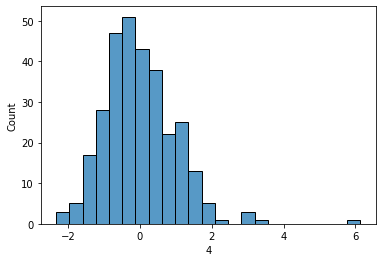

In [13]:
sns.histplot(df[4])

ALTERING THE DISTRIBUTION OF DATA

In [14]:
#Manipulate the data in such a way that its histpgram follows a normal distribution
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal')
df[[4,9]]=transformer.fit_transform(df[[4,9]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (303). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


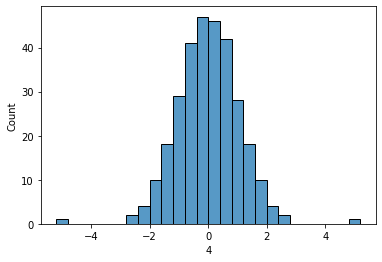

In [15]:
sns.histplot(df[4])

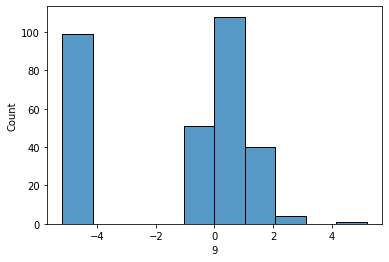

In [16]:
sns.histplot(df[9])

DATA DIMENSIONALITY REDUCTION

DDR - LINEAR DISCRIMINANT ANALYSIS

In [1]:
#reduce the entire dataset from 13 dimensions to 2 dimensions, all the while using the labels [0,1,2,3,4]

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df = pd.read_csv("processed.cleveland.data", header=None)
df = df.apply(pd.to_numeric, errors='coerce').dropna()

In [18]:
X = df[[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = df[13].values

dr = LinearDiscriminantAnalysis(n_components=2)
X_ = dr.fit_transform(X,y)

In [28]:
df_ = pd.DataFrame(X_, columns=['D1', 'D2'])

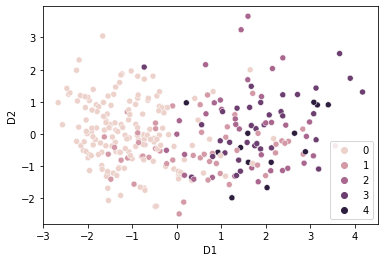

In [35]:
sns.scatterplot(data=df_, x='D1', y='D2', hue=y)

In [36]:
#the values with 0 (no heart disease) are mostly clustered toward the left side. 

KERNEL PCA

In [37]:
from sklearn.decomposition import KernelPCA

dr = KernelPCA(n_components=2, kernel='linear')
X_ = dr.fit_transform(X)

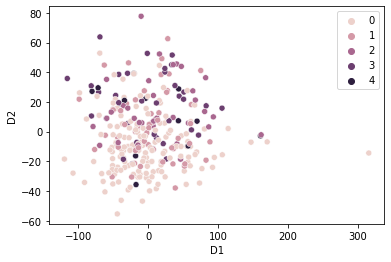

In [40]:
df_ = pd.DataFrame(X_, columns=['D1','D2'])
sns.scatterplot(data=df_, x='D1', y='D2', hue=y)